# 강남 3구는 안전한가?

* 강남3구의 주민들이 자신들이 거주하는 구의 체감 안전도를 높게 생각한다는 기사를 확인하자.
* 기사 원문 http://news1.kr/articles/?1911504

# 데이터 정리하기

* 필요한 모듈을 import한다.

* 받은 데이터(csv) 파일을 읽는다, 콤마(,)로 천단위가 구분되어 있고, 한글 엔코딩은 **euc-kr**이다
* 교재에서 접근하는 방식으로 데이터를 수집하려하면 교재 집필하던 때와 데이터의 형식이 변경되어 있다.
* 지금은 데이터를 얻는 것이 실제 데이터라는 것에 대한 증명일 뿐이므로, 해당 데이터를 Github에서 배포하는 데이터를 다운받는 것으로 한다.

In [ ]:
# 데이터 로드


### 강남 3구가 안전한지 확인하려는 것인데, 데이터가 관서별로 되어 있음. 경찰서 목록을 소속 구별로 변경해야 함.
- [Google Maps Geocoding API]https://developers.google.com/maps/?hl=ko

* 구글 맵스를 사용해서 경찰서의 위치(위도, 경도) 정보를 받아온다

In [ ]:
# 구글맵 패키지


In [ ]:
# https://developers.google.com/maps/documentation/geocoding/start?hl=ko


#### JSON
JSON(JavaScript Object Notation)은 속성-값 쌍( attribute–value pairs and array data types (or any other serializable value))으로 이루어진 데이터 오브젝트를 전달하기 위해 인간이 읽을 수 있는 텍스트를 사용하는 개방형 표준 포맷이다. 비동기 브라우저/서버 통신 (AJAX)을 위해, 넓게는 XML(AJAX가 사용)을 대체하는 주요 데이터 포맷이다. 특히, 인터넷에서 자료를 주고 받을 때 그 자료를 표현하는 방법으로 알려져 있다. 자료의 종류에 큰 제한은 없으며, 특히 컴퓨터 프로그램의 변수값을 표현하는 데 적합하다.

본래는 자바스크립트 언어로부터 파생되어 자바스크립트의 구문 형식을 따르지만 언어 독립형 데이터 포맷이다. 즉, 프로그래밍 언어나 플랫폼에 독립적이므로, 구문 분석 및 JSON 데이터 생성을 위한 코드는 C, C++, C#, 자바, 자바스크립트, 펄, 파이썬 등 수많은 프로그래밍 언어에서 쉽게 이용할 수 있다.
{
    "이름": "홍길동",
    "나이": 25,
    "성별": "여",
    "주소": "서울특별시 양천구 목동",
    "특기": ["농구", "도술"],
    "가족관계": {"#": 2, "아버지": "홍판서", "어머니": "춘섬"},
    "회사": "경기 수원시 팔달구 우만동"
 }

In [ ]:
gmaps.geocode('서울강남경찰서', language='ko')

In [ ]:
# 검색 키워드 만들기 ex) XX경찰서


In [ ]:
# 데이터 내 모든 경찰서의 주소 얻기
station_addreess = []
station_lat = []
station_lng = []

for name in station_name: # 조금 전 작업한 station_name에서
    tmp = gmaps.geocode(name, language='ko') # 경찰서이름을 넣고, geocode 정보를 가져와 tmp에 저장한다.
    station_addreess.append(tmp[0].get("formatted_address")) # tmp[0]번째의 'formatted_address'를 가져와 station_address에 저장한다.
    
    tmp_loc = tmp[0].get("geometry") # tmp[0]번째의 'geometry' 정보를 tmp_loc에 저장한다.

    station_lat.append(tmp_loc['location']['lat']) # tmp_loc의 'location' 부분의 'lat'를 station_lat에 추가한다.
    station_lng.append(tmp_loc['location']['lng']) # tmp_loc의 'location' 부분의 'lng'를 station_lng에 추가한다.
    
    print(name + '-->' + tmp[0].get("formatted_address")) # 검색한 이름과 추가된 정보를 --> 로 구분하여 표현해 준다.

In [ ]:
# 주소 확인


In [ ]:
# 위도 확인


In [ ]:
# 경도 확인


In [ ]:
# 경찰서의 소속 행정구를 '구별'이라는 속성으로 저장하기
gu_name = []

for name in station_addreess:
    tmp = name.split() # 공백(space)를 구분으로 문자열을 분리한다.
    
    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0] # tmp 내 gu를 순회하면서, gu의 마지막 글자가 '구'로 끝나는 글자들을 tmp_gu에 저장함.
    
    gu_name.append(tmp_gu)
    
crime_police['구별'] = gu_name # 데이터에 '구별'이라는 새로운 열을 만든다.
crime_police.head()

#### 여기서 잠깐! 금천경찰서의 위치는 예외(관악구에 위치함)이다.
- https://ko.wikipedia.org/wiki/%EC%84%9C%EC%9A%B8%EA%B8%88%EC%B2%9C%EA%B2%BD%EC%B0%B0%EC%84%9C

In [ ]:
# 금천경찰서의 위치 확인

In [ ]:
 # 실제는 관악구이지만 향후 이전할 것이기 때문에 금천구로 변경해놓자.
 # 바뀐 모습 확인

In [ ]:
# 엑셀로 저장히기 to_csv() 사용


In [ ]:
# 강남구에는 경찰서가 두개 존재한다.

# pandas의 pivot_table 익히기
## 피벗 테이블은 왜 필요한가?
- 어느 날 직장상사가 엑셀자료를 주면서 새로운 포맷의 정리 자료,(예를 들어, '제품별로 정리된 판매현황'이라든지, '판매처별로 정리된 판매현황'이라든지 만들어올 것을 지시)
- 엑셀이나 파이썬에 피벗 테이블 기능이 없다면... 각각의 지시사항에 어울리는 새로운 2가지 표를 수작업으로 만들어야 함. 

- 2가지 자료를 완성하여 보고하였으나, '담당자별 판매현황'을 정리해오라고 요구한다면 데이터 노동을 해야 함.
- 새로운 정리자료를 만들기 위해 데이터를 조작하는 기능을 피벗_테이블(pivot_table)이라고 함.

## 예제 http://pbpython.com/pandas-pivot-table-explained.html
#### 이 예제는 영업 파이프 라인(funnel)을 추적한다.
- 기본적인 문제는 일부 판매주기가 매우 길고 ( "엔터프라이즈 소프트웨어", 자본 장비 등) 경영진이 일년 내내 더 자세히 이해하고자 함.

#### 일반적인 질문은 다음과 같습니다.
1. 파이프 라인에 얼마나 많은 수익이 있습니까?
2. 어떤 제품이 파이프 라인에 있습니까?
3. 누가 어떤 제품을 어떤 단계에 가지고 있습니까?
4. 연말까지 거래를 성사시킬 가능성은 어느 정도입니까?

### 많은 회사는 판매를 통해 프로세스를 추적하는 CRM 도구 또는 기타 소프트웨어를 보유하게됩니다. 데이터를 분석하는 데 유용한 도구가있을 수도 있지만 필연적으로 누군가가 데이터를 Excel로 내보내고 피벗 테이블을 사용하여 데이터를 요약합니다.

#### 팬더의 피벗 테이블을 사용하면 다음과 같은 좋은 대안이 될 수 있습니다.

1. 더 빨리 (일단 설치되면)
2. 자체 문서화 (코드를 보면 코드가 무엇을하는지 알 수 있습니다.)
3. 보고서 또는 전자 메일 생성에 사용하기 쉽습니다.
4. 사용자 정의 집계 함수를 정의 할 수 있으므로 유연성이 향상되었습니다.

### 피벗 테이블 cheatsheet
![피벗테이블](pivot-table-datasheet.png)

In [ ]:
# 예제 데이터


In [ ]:
# 회사별 account, price, quantity
# 가장 간단한 피벗 테이블에는 데이터 프레임과 색인이 있어야 함. 이 경우 컬럼명을 색인으로 사용할 것.


In [ ]:
# 회사 / 대리인 / 담당자 - account price quantity
# 또한 여러 개의 인덱스를 가질 수 있음. 사실, pivot_table 인자(args)의 대부분은 리스트 형태로 여러 값을 취할 수 있음.


In [ ]:
# 담당자 / 대리인 - account price quantity
# Manager와 Rep의 순서를 변경하여 하는 것입니다. 인덱스를 변경하는 것만으로도 쉽게 할 수 있습니다.


In [ ]:
# 담당자 - 대리인 - 가격(평균)만!
# account 및 quantity 열은 기준으로 사용하기에 유용하지 않음. 값 필드를 사용하여 관심있는 열을 명시적으로 정의하여 제거해 보겠습니다.


In [ ]:
# 담당자 - 대리인 - 가격(합계)만!
# 가격 열은 데이터를 자동으로 평균화하지만 빈도수 또는 합계를 계산할 수 있다. aggfunc와 np.sum을 사용하면 합계를 간단히 추가 할 수 있다.


In [ ]:
# 담당자 / 대리인 - price(평균) / price(빈도)
# aggfunc는 함수 목록을 취할 수 있다. numpy의 mean 함수와 len 함수를 사용하여 평균값과 빈도수 값을 각각 계산해 본다.
 # mean은 평균, len은 빈도수

In [ ]:
# 담당자 / 대리인 - product별 price(합계)
# 제품별로 판매가 세분화되기를 원한다면, columns 변수를 사용하여 하나 이상의 열을 정의 할 수 있습니다.


#### Columns vs. Values
- pivot_table과 혼란스러운 점 중 하나는 컬럼과 값의 사용이다.
- 열은 선택 사항이다.
- 실제 값을 구분할 수있는 추가 방법을 제공한다. 
- 집계 함수는 사용자가 나열한 값에 적용됩니다.

In [ ]:
# 담당자 / 대리인 - 제품별 price(합계), NaN 문제
# NaN(값 없음)을 제거하려면 fill_value를 사용하여 0으로 설정할 수 있다.


In [ ]:
# 담당자 / 대리인 / 제품 - price / quantity
# 수량을 추가하는 것도 도움이 된다. 값(value) 목록에 수량(quantity)을 추가해보자.


In [ ]:
# 담당자 / 대리인 / 제품 - price(합계) quantity(합계) / price(평균) quantity(평균) - 합계(margin)
# 항목을 색인으로 이동하여 다른 시각적 표현을 얻을 수 있다. 열에서 제품(product)을 제거하고 색인에 추가하자.


# 범죄 데이터 구별로 정리하기

In [ ]:
# 데이터 불러오기

# '구별'을 중심으로 양적 데이터의 합계를 구함.


In [ ]:
# 새로운 변수를 만들자 = 검거는 와닿지 않기 때문에 검거율로 변환한다. 




In [ ]:
# 검거율 5개 항목의 최대치를 100으로 조정


In [ ]:
# 변수의 이름 바꾸기


In [ ]:
# 파이썬 머신러닝 패키지 scikit-learn 불러오기


# 위에 해당되는 컬럼의 값만 x에 저장하기

#### 많은 양의 데이터를 처리함에 있어 여러 이유로 평균화, 즉 데이터의 범위를 일치시키거나 분포를 유사하게 만들어 주는 등의 작업은 꼭 필요한 일이다. 
- 본 데이터는 scikit-learn의 MinMaxScaler()를 활용하여 평균화 한다.
    - 평균화는 모든 데이터의 값을 [0, 1] 의 구간으로 한정시키는 것이다.
    - 변형 X_std = (X - X.min) / (X.max - X.min)
    - X_scaled = X_std * (최대 - 최소) + 최소

In [1]:
# 전처리 - 평균화 수행
min_max_scaler = preprocessing.MinMaxScaler() # 

x_scaled = min_max_scaler.fit_transform(x.astype(float)) # 데이터만 있는 x값들을 전처리 수행함.
crime_norm = pd.DataFrame(x_scaled, columns = col, index = crime.index) # crime_norm이라는 데이터 프레임을 새로 만듬.


# col2 데이터 속성 정리
col2=['강간검거율','강도검거율','살인검거율','절도검거율','폭력검거율']
# crime[col2] 부분을 그대로 crime_norm[col2]에 이식함.
crime_norm[col2]=crime[col2]
crime_norm.head()

NameError: name 'preprocessing' is not defined

### 지난 시간에 분석한 CCTV_result.csv 파일 내에 구별 인구수와 CCTV 개수를 가지고 오자.

In [2]:
# 지난 시간에 만든 데이터를 불러오기
result_CCTV=pd.read_csv("01.CCTV_result.csv",encoding,
                        'utf-8',
                        index_col="구별")
crime_norm[['인구수','CCTV']]=result_CCTV[['인구수','소계']]
crime_norm.head()

NameError: name 'pd' is not defined

In [3]:
# 범죄라는 속성값을 만들고, 강간, 강도, 살인, 절도, 폭력 건수(평균화 점수)를 더한다.
col = ['강간', '강도', '살인', '절도', '폭력']
crime_norm['범죄'] = np.sum(crime_norm[col],axis=1)
crime_norm.head()

NameError: name 'np' is not defined

In [4]:
# 검거라는 속성값을 만들고, 강간검거율, 강도검거율, 살인검거율, 절도검거율, 폭력검거율 건수(평균화 점수)를 더한다.
col2=['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_norm['검거'] = np.sum(crime_norm[col2],axis=1)
crime_norm.head()

NameError: name 'np' is not defined

# seaborn

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline

In [6]:
# 연습 데이터 tips는 seaborn 패키지에 들어있는 데이터이며, 요일별 점심, 저녁, 흡연 여부와 식사 금액과 팁을 정리한 데이터이다.
tips = sns.load_dataset("tips", engine='python')
tips.tail(5)

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


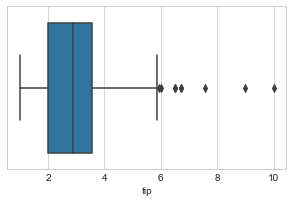

In [9]:
# 데이터 시각화
sns.set_style("whitegrid")

plt.figure(figsize=(5,3))
sns.boxplot(x=tips["tip"]) # 1차원 박스 플롯
plt.show()

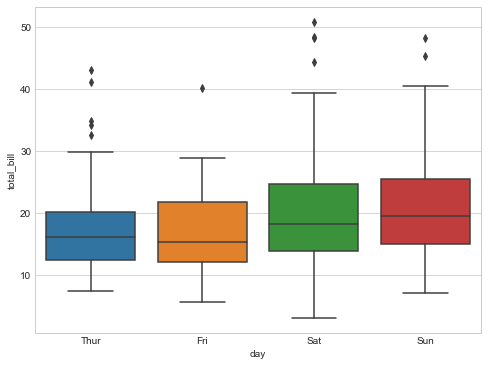

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", data=tips) # 2차원 박스 플롯
plt.show()

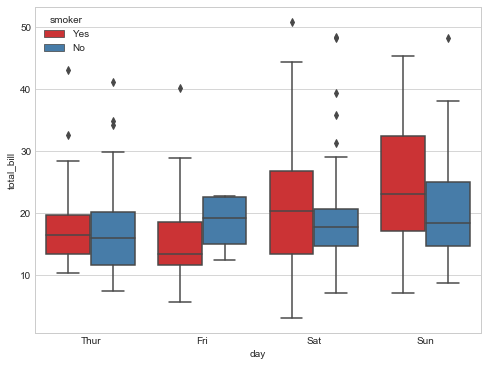

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", hue="smoker", data=tips, palette="Set1") # hue 옵션은 집단(흡연/비흡연)을 분류할 수 있음. 
plt.show()
# 흡연자의 결제비율 범위가 큼

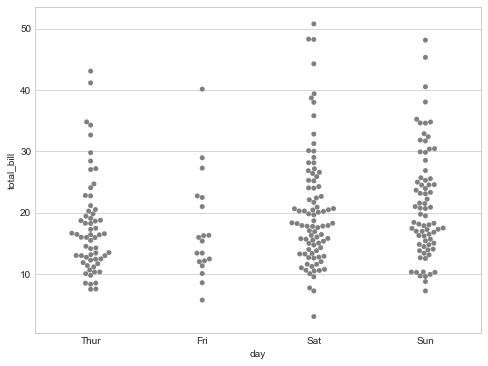

In [13]:
plt.figure(figsize=(8,6))
sns.swarmplot(x="day", y="total_bill", data=tips, color=".5")
plt.show()

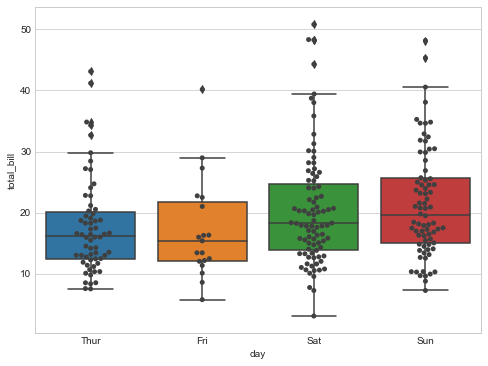

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, color=".25")
plt.show()

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

tips = sns.load_dataset("tips", engine='python')
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


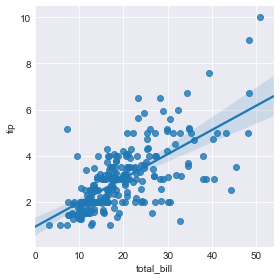

In [18]:
sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", data=tips, size=4) # regression plot
plt.show()

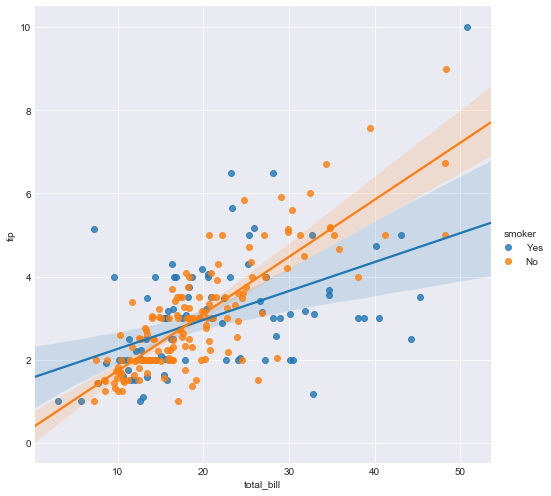

In [19]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, size=7)
plt.show()

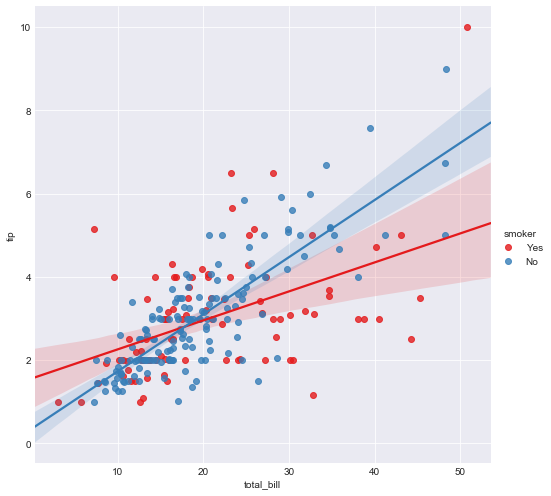

In [20]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, palette="Set1", size=7)
plt.show()

In [21]:
flights = sns.load_dataset("flights", engine='python')
flights.head(5)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [22]:
flights = flights.pivot("month", "year", "passengers")
flights.head(5)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


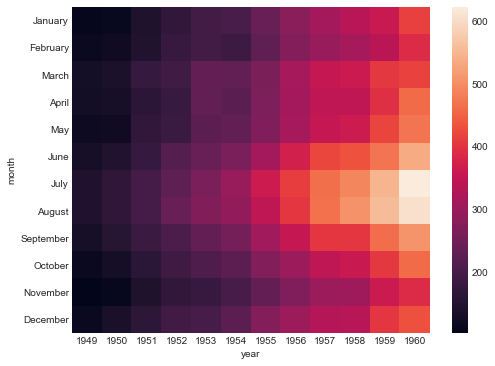

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(flights)
plt.show()

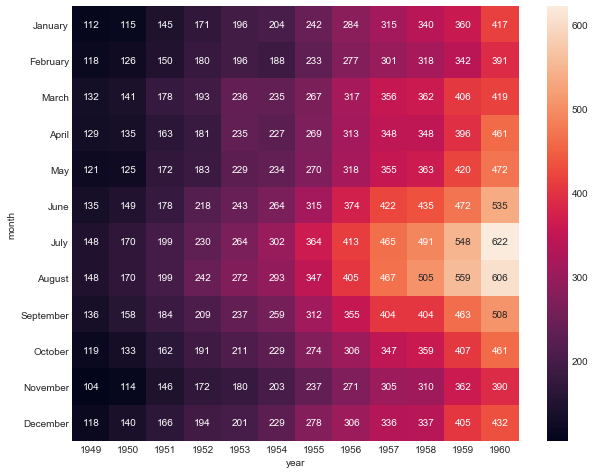

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt="d")
plt.show()

In [26]:
sns.set(style="ticks")
iris = sns.load_dataset("iris", engine='python')
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


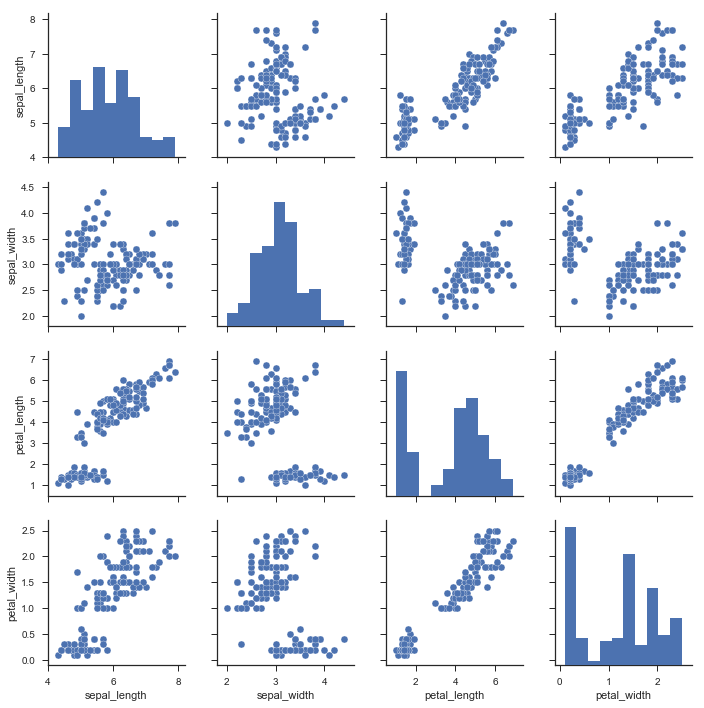

In [27]:
sns.pairplot(iris)
plt.show()

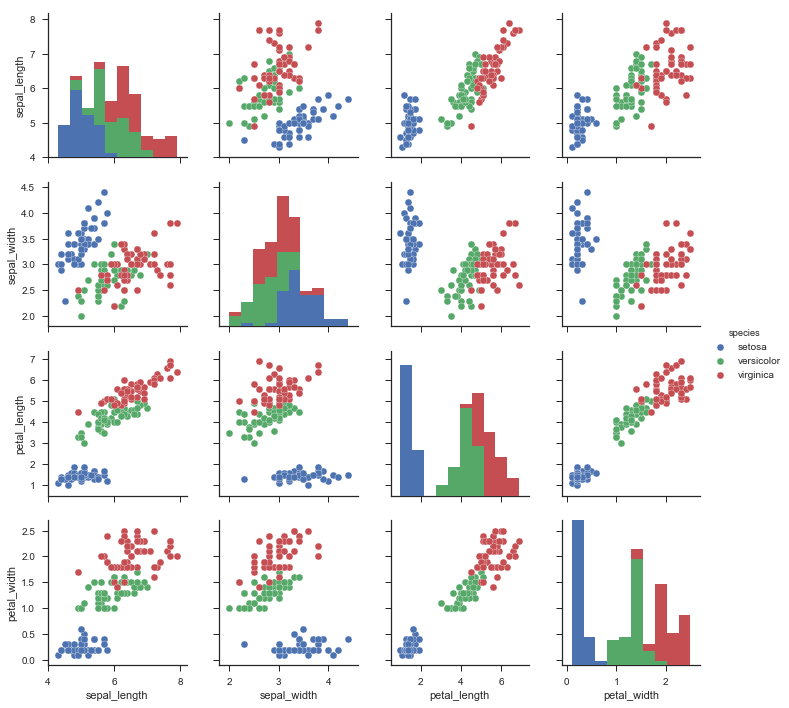

In [28]:
sns.pairplot(iris, hue="species")
plt.show()

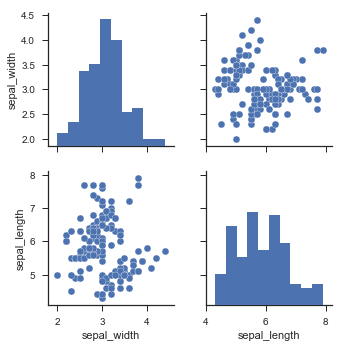

In [29]:
sns.pairplot(iris, vars=["sepal_width", "sepal_length"])
plt.show()

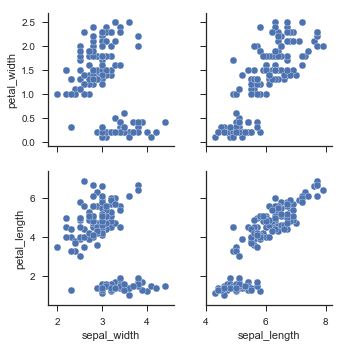

In [30]:
sns.pairplot(iris, x_vars=["sepal_width", "sepal_length"], 
             y_vars=["petal_width", "petal_length"])
plt.show()

# Visualization using seaborn

In [1]:
# 시각화 패키지 matplotlib과 seaborn 불러오기
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 폰트 문제 해결하기
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [2]:
crime_norm.head()

NameError: name 'crime_norm' is not defined

In [3]:
# 강도, 살인, 폭력의 상관관계 분석
sns.pairplot(crime_norm,vars=["강도","살인","폭력"],
            kind='reg',size=3)
plt.show()

NameError: name 'crime_norm' is not defined

세가지 폭력범죄는 모두 양의 상관관계가 존재함.

In [6]:
sns.pairplot(crime_norm, x_vars = ["인구수","CCTV"],
            y_vars = ['살인','강도','폭력','강간','절도']
            kind = 'reg',
            size = 2)

SyntaxError: invalid syntax (<ipython-input-6-c00b4bcd7b73>, line 3)

-인구수 및 cctv 개수 - 5대 폭력 간의 상관관계는 모두 양의 상관관계.
-미미하지만, cctv 개수가 적을 때 5대 범죄가 많이 일어나는 현상이 보임.

In [7]:
# 인구수 CCTV와 살인검거율과 폭력검거율의 상관관계
sns.pairplot(crime_norm, x_vars = ["인구수","CCTV"],
            y_vars = ['살인검거율','강도검거율','폭력검거율','강간검거율','절도검거율']
            kind = 'reg',
            size = 2)

SyntaxError: invalid syntax (<ipython-input-7-182b2a72356e>, line 4)

    -cctv와 각 폭력검거율과의 상관관계는 절도검거율만 제외하고 음의 상관관계임.
    -절도 검거율은 cctv가 많을 수록 높아짐.
    -cctv가 많은 것이 폭력검거율이 적은 것과 관게가 잇어 보임.(cctv 예방 효과)
    -그러나, 절도 검거율을 제외하고는 음의 상관관계가 있음.

In [11]:
# 검거 열을 최대치 100으로 환산
tmp_max = crime_normal['검거'].max() #가장 큰 검거 수 값 찾기
crime_normal['검거'] = crime_normal['검거'] / tmp_max * 100
crime_norm.sort = crime_norm.sort_values(by='검거',
                                        ascending =False)
crime_norm_sort.head()

NameError: name 'crime_normal' is not defined

In [12]:
# 구별 5대 범죄 검거율을 히트맵으로 그리기
target_col = col2 # ['살인검거율','강도검거율','폭력검거율','강간검거율','절도검거율']

plt.figure(figsize=(10,10))
sns.heatmap(crime_norm_sort[target_col],annot=True,
           fmt='f', linewidths=3, cmap='RdPu')
plt.show()

NameError: name 'col2' is not defined

In [ ]:
# 발생건수의 합으로 정렬
target_col = append('범죄') # 5대범죄

plt.figure(figsize=(10,10))
sns.heatmap(crime_norm_sort[target_col],annot=True,
           fmt='f', linewidths=3, cmap='RdPu')
plt.show()

In [14]:
target_col = ['살인','강도','폭력','강간','절도']

crime_normal['검거'] = crime_normal['범죄'] / 5

crime_norm_sort = crime_norm.sort_values(by='범죄',
                                        ascending =False)

plt.figure(figsize=(10,10))
sns.heatmap(crime_norm_sort[target_col],annot=True,
           fmt='f', linewidths=3, cmap='RdPu')
plt.show()

NameError: name 'crime_normal' is not defined

# Folium 

In [16]:
import folium

# 범죄율에 대한 지도 시각화

In [18]:
crime_norm

NameError: name 'crime_norm' is not defined

In [20]:
# 한국 지도 형태 가져오기
import json
geo_path = 'skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [21]:
# 살인 발생 건수로 그리기
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_norm['강간'],
               columns = [crime_norm.index, crime_norm['강간']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

NameError: name 'crime_norm' is not defined

In [22]:
# 범죄 발생 건수로 그리기
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_norm['범죄'],
               columns = [crime_norm.index, crime_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

NameError: name 'crime_norm' is not defined

In [23]:
# 살인 발생 건수로 그리기
tmp_criminal = crime_norm['살인'] /  crime_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [crime.index, tmp_criminal],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

NameError: name 'crime_norm' is not defined

In [ ]:
# 범죄 발생 건수로 그리기
tmp_criminal = crime_norm['범죄'] /  crime_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = tmp_criminal,
               columns = [crime.index, tmp_criminal],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')
map

In [ ]:
# 색깔 조합 YlGnBu
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = crime_norm['검거'],
               columns = [crime_norm.index, crime_norm['검거']],
               fill_color = 'YlGnBu', #PuRd, YlGnBu
               key_on = 'feature.id')
map

# 경찰서별 검거현황과 구별 범죄발생 현황을 표현하기

In [24]:
# 경찰서 위치 저장
crime_raw['lat'] = station_lat
crime_raw['lng'] = station_lng

col = ['살인 검거', '강도 검거', '강간 검거', '절도 검거', '폭력 검거']
tmp = crime_raw[col] / crime_raw[col].max()
    
crime_raw['검거'] = np.sum(tmp, axis=1)

crime_raw.head()

NameError: name 'station_lat' is not defined

In [25]:
# 경찰서 위치 띄우기
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_raw.index:
    folium.Marker([crime_raw['lat'][n], 
                   crime_raw['lng'][n]]).add_to(map)
    
map

NameError: name 'crime_raw' is not defined

In [ ]:
# 검거에 적당한 값(10)을 곱해서 원 넓이를 정하고, 경찰서의 검거율을 원의 넓이로 표현한다.
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_raw.index:
    folium.CircleMarker([crime_raw['lat'][n], crime_raw['lng'][n]], 
                        radius = crime_raw['검거'][n]*10, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
    
map

In [ ]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data = geo_str,
               data = crime_norm['범죄'],
               columns = [crime_norm.index, crime_norm['범죄']],
               fill_color = 'PuRd', #PuRd, YlGnBu
               key_on = 'feature.id')

for n in crime_raw.index:
    folium.CircleMarker([crime_raw['lat'][n], crime_raw['lng'][n]], 
                        radius = crime_raw['검거'][n]*10, 
                        color='#3186cc', fill_color='#3186cc', fill=True).add_to(map)
    
map